In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pickle
import os 
import sys
import numpy as np 
from matplotlib.colors import ListedColormap, BoundaryNorm
sys.path.append(os.path.dirname(os.path.abspath('')))
from afpo import AFPO
import matplotlib as mpl


In [3]:
positions_x = []  # X-coordinates
positions_y = []  # Y-coordinates

hex_radius = 1
hex_height = np.sqrt(3) * hex_radius  # Height of the hexagon (vertical spacing)
values = [[1]*3, [1]*4, [1]*3]

for row_idx, row in enumerate(values):
    for col_idx, value in enumerate(row):
        # Offset every second row to create the hexagonal pattern
        x_pos = (col_idx - 0.5 * (row_idx % 2))*0.22
        y_pos = (-row_idx * hex_height)*0.1
        positions_x.append(x_pos)
        positions_y.append(y_pos)

0.4418605 0.018618986725025252
0.44087749433296725 0.01627540748764494
0.4418605 0.018571184369578827
0.4418605 0.019595917942265423
0.4418605 0.018618986725025252
0.44087749433296725 0.01627540748764494
0.4418605 0.018571184369578827
0.4418605 0.019595917942265423


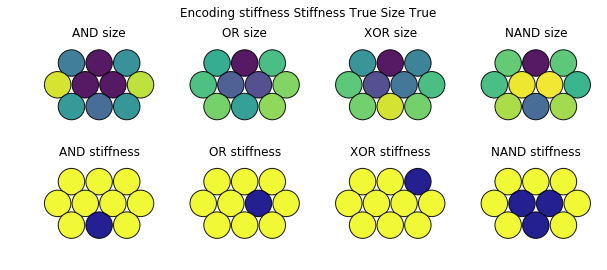

In [10]:
seeds = 30
gen = 100
fig, axs = plt.subplots(2, 4, figsize=(10, 4))
axs = axs.flatten()
offset = 0 
encoding = "stiffness"
size = True
stiffness = True
plot_type = "std"
for color_coding in ['size', 'stiffness']:
    for idx, gate in enumerate(["AND", "OR", "XOR", "NAND"]):

        stiffness_by_particle = {}
        size_by_particle = {}
        for particle in range(10):
            stiffness_by_particle[particle] = []
            size_by_particle[particle] = []

        for seed in range(seeds):
            checkpoint_file = f'../checkpoints/{encoding}_encoding/{gate}/run{seed}_gen{gen}_change_stiffness_{stiffness}_change_size_{size}_gate{gate}_encoding{encoding}.p'
            with open(checkpoint_file, 'rb') as f:
                afpo, rng_state, np_rng_state = pickle.load(f)
            best_mat = afpo.return_best()
            for p_idx, particle in enumerate(best_mat.particles):
                stiffness_by_particle[p_idx].append(particle.stiffness)
                size_by_particle[p_idx].append(particle.expansion)
        if plot_type == "std":
            mean_size_by_particle = [np.std(x) for x in size_by_particle.values()]
            mean_stiffness_by_particle = [np.std(x) for x in stiffness_by_particle.values()]
            print(max(mean_stiffness_by_particle), max(mean_size_by_particle))
            norm = mpl.colors.Normalize(vmin=0, vmax=0.02) if color_coding == "size" else mpl.colors.Normalize(vmin=0, vmax=0.02)

        else:
            mean_size_by_particle = [sum(x)/len(x) for x in size_by_particle.values()]
            mean_stiffness_by_particle = [sum(x)/len(x) for x in stiffness_by_particle.values()]
            norm = mpl.colors.Normalize(vmin=0, vmax=0.02) if color_coding == "size" else mpl.colors.Normalize(vmin=0, vmax=1)

        colors = mean_size_by_particle  if color_coding=="size" else mean_stiffness_by_particle   
        cmap = 'viridis'  if color_coding=="size" else 'plasma'

        scatter = axs[idx+offset].scatter(positions_x, positions_y, s=700, c=colors, cmap=cmap, norm=norm, edgecolors='black', alpha=0.9)
        axs[idx+offset].set_title(f"{gate} {color_coding}")
        axs[idx+offset].set_aspect('equal')
        axs[idx+offset].axis('off')  # Turn off the axis for a cleaner look
    offset+=4

    # plt.colorbar(scatter, label='Value')
plt.suptitle(f"Encoding {encoding} Stiffness {stiffness} Size {size}")
# plt.tight_layout()
plt.show()

[1.0, 0.7937984333333332, 0.9410852666666667, 0.3519379333333333, 0.9116279000000002, 0.9705426333333332, 0.6465116, 0.3813953000000001, 0.11627900000000001, 0.2046510999999999]
[0.9705426333333332, 0.8821705333333332, 0.7348836999999999, 0.32248056666666663, 0.7054263333333333, 0.793798433333333, 0.23410846666666646, 0.2930231999999999, 0.1751937333333332, 0.4992247666666667]
[0.9116279000000002, 0.3519379333333334, 0.9116278999999998, 0.9705426333333332, 0.9705426333333332, 0.9705426333333332, 0.9410852666666666, 0.49922476666666676, 0.1751937333333332, 0.4697674000000001]
[0.9410852666666666, 0.7643410666666668, 0.9410852666666666, 0.14573636666666664, 1.0, 1.0, 0.1751937333333332, 0.7054263333333332, 0.11627900000000001, 0.7054263333333334]


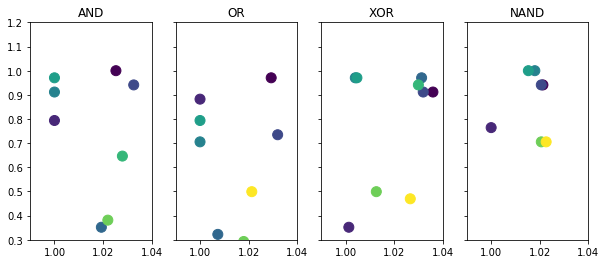

In [13]:
seeds = 30
gen = 100
fig, axs = plt.subplots(1, 4, figsize=(10, 4), sharex=True, sharey=True)
axs = axs.flatten()
offset = 0 
encoding = "size"
size = True
stiffness = True
plot_type = "m"
# for color_coding in ['size', 'stiffness']:
for idx, gate in enumerate(["AND", "OR", "XOR", "NAND"]):

    stiffness_by_particle = {}
    size_by_particle = {}
    for particle in range(10):
        stiffness_by_particle[particle] = []
        size_by_particle[particle] = []

    for seed in range(seeds):
        checkpoint_file = f'../checkpoints/{encoding}_encoding/{gate}/run{seed}_gen{gen}_change_stiffness_{stiffness}_change_size_{size}_gate{gate}_encoding{encoding}.p'
        with open(checkpoint_file, 'rb') as f:
            afpo, rng_state, np_rng_state = pickle.load(f)
        best_mat = afpo.return_best()
        for p_idx, particle in enumerate(best_mat.particles):
            stiffness_by_particle[p_idx].append(particle.stiffness)
            size_by_particle[p_idx].append(particle.expansion)
    if plot_type == "std":
        mean_size_by_particle = [np.std(x) for x in size_by_particle.values()]
        mean_stiffness_by_particle = [np.std(x) for x in stiffness_by_particle.values()]
        print(max(mean_stiffness_by_particle), max(mean_size_by_particle))
        norm = mpl.colors.Normalize(vmin=0, vmax=0.02) if color_coding == "size" else mpl.colors.Normalize(vmin=1, vmax=4.5)

    else:
        mean_size_by_particle = [sum(x)/len(x) for x in size_by_particle.values()]
        mean_stiffness_by_particle = [sum(x)/len(x) for x in stiffness_by_particle.values()]
        norm = mpl.colors.Normalize(vmin=0, vmax=0.02) if color_coding == "size" else mpl.colors.Normalize(vmin=0, vmax=10)

    colors = mean_size_by_particle  if color_coding=="size" else mean_stiffness_by_particle   
    cmap = 'viridis'  if color_coding=="size" else 'plasma'
    colors = plt.cm.viridis(np.linspace(0, 1, 10))
    # plt.scatter(x, y, c=range(10), cmap='viridis', s=100)
    axs[idx].scatter(np.array(mean_size_by_particle)+1, mean_stiffness_by_particle, label=gate, c=range(10), cmap='viridis', s=100)
    print(mean_stiffness_by_particle)
    axs[idx].set_title(f'{gate}')
    axs[idx].set_xlim([0.99,1.04])
    axs[idx].set_ylim([0.3,1.2])


    # scatter = axs[idx+offset].scatter(positions_x, positions_y, s=700, c=colors, cmap=cmap, norm=norm, edgecolors='black', alpha=0.9)
    # axs[idx+offset].set_title(f"{gate} {color_coding}")
    # axs[idx+offset].set_aspect('equal')
    # axs[idx+offset].axis('off')  # Turn off the axis for a cleaner look
offset+=4

    # plt.colorbar(scatter, label='Value')
# plt.suptitle(f"Encoding {encoding} Stiffness {stiffness} Size {size}")
# plt.tight_layout()
# plt.legend()
# plt.colorbar()
plt.show()

4.114405683464373
5 4.833385124829498 stiffness
BEST material:
fitness: 4.833385124829498, age: 100, id: 5346
particle stiffness 1.0
particle stiffness 0.116279
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 0.116279
particle stiffness 0.116279
particle stiffness 0.116279
7 4.833385124829498 stiffness
BEST material:
fitness: 4.833385124829498, age: 100, id: 7826
particle stiffness 1.0
particle stiffness 0.116279
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 0.116279
particle stiffness 0.116279
particle stiffness 1.0
11 4.833385124829498 stiffness
BEST material:
fitness: 4.833385124829498, age: 66, id: 7238
particle stiffness 1.0
particle stiffness 0.116279
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 1.0
particle stiffness 0.116279
particle stiffnes

No handles with labels found to put in legend.


4.833385124829499


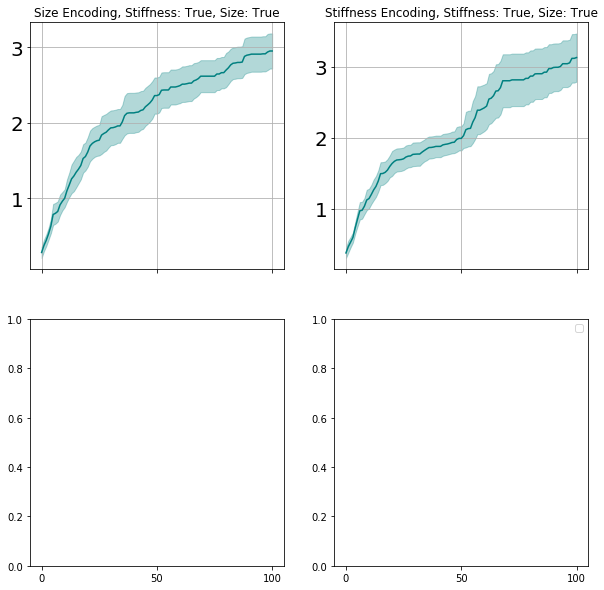

In [21]:
seeds = 30
gen = 100
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=False)
axs = axs.flatten()

size_stiffness_options = {1:['size', True, True], 2:['stiffness', True, True]}
colors = ['teal', 'indigo', 'yellow', 'navy']

for e_idx, options in enumerate(size_stiffness_options.values()): 
    encoding = options[0]
    stiffness = options[1]
    size = options[2]
    for idx, gate in enumerate(["XOR"]):#, "OR", "XOR", "NAND"]):
        means = np.zeros((30, 101))
        curr_color = colors[idx]
        for seed in range(seeds):
            checkpoint_file = f'../checkpoints/{encoding}_encoding/{gate}/run{seed}_gen{gen}_change_stiffness_{stiffness}_change_size_{size}_gate{gate}_encoding{encoding}.p'
            with open(checkpoint_file, 'rb') as f:
                afpo, rng_state, np_rng_state = pickle.load(f)
            best_mat = afpo.return_best()
            if best_mat.fitness > 4.8:print(seed, best_mat.fitness, encoding);afpo.print_best(False)
            means[seed] = np.max(afpo.fitness_data[:,:,0], axis=1)[:101]
        print(np.max(means))
        
        # Calculate mean and standard error of the mean (SEM) across seeds
        mean_values = np.mean(means, axis=0)
        sem_values = np.std(means, axis=0) / np.sqrt(seeds)

        # Calculate 95% confidence intervals (CI = 1.96 * SEM for a normal distribution)
        lower_bound = mean_values - 1.96 * sem_values
        upper_bound = mean_values + 1.96 * sem_values

        # Plot the mean line
        axs[e_idx].plot(mean_values, color=curr_color, label=gate)
        axs[e_idx].tick_params(axis='x', labelsize=20)  # Adjust the size of the x-axis ticks
        axs[e_idx].tick_params(axis='y', labelsize=20)  # Adjust the size of the x-axis ticks



        # Fill the confidence interval
        axs[e_idx].fill_between(range(len(mean_values)), lower_bound, upper_bound, color=curr_color, alpha=0.3)

        axs[e_idx].set_title(f'{encoding.capitalize()} Encoding, Stiffness: {stiffness}, Size: {size}')
        axs[e_idx].grid(True)

plt.legend()
plt.show()
